SOLVING DATASET USING DATA AUGMENTED CNN MODEL

IMPORT NECESSARY LIBRARIES:-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar100
print('Importing successfully done')

Importing successfully done


LOAD CIFAR-100 DATASET:-

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


#Summarize the dataset:

#The CIFAR-100 dataset is a widely used benchmark for image classification tasks in machine learning. 
#The dataset consists of 60,000 color images, each of size 32x32 pixels. 
#These images are divided into 50,000 training images and 10,000 test images.
#There are 100 different classes in CIFAR-100, each containing 600 images. 
#The classes are mutually exclusive, meaning each image belongs to one and only one class.
#The 100 classes are grouped into 20 superclasses. Each superclass contains five related classes. 
#For eg; the superclass "vehicles 1" includes classes such as bicycle, bus, motorcycle, pickup truck, and train.
#Each image in the dataset comes with a fine label (one of the 100 classes) and a coarse label (one of the 20 superclasses).
#The CIFAR-100 dataset is used to train and evaluate machine learning models, particularly for tasks related to image recognition and classification.

PRE-PROCESSING THE DATASET:-

In [4]:
x_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [5]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [6]:
x_test

array([[[[199, 215, 249],
         [196, 211, 244],
         [195, 210, 243],
         ...,
         [216, 231, 250],
         [217, 231, 250],
         [224, 234, 252]],

        [[197, 210, 239],
         [195, 208, 238],
         [195, 210, 240],
         ...,
         [231, 243, 250],
         [233, 243, 250],
         [241, 245, 253]],

        [[222, 226, 246],
         [213, 220, 242],
         [209, 219, 243],
         ...,
         [243, 250, 251],
         [244, 249, 251],
         [250, 250, 253]],

        ...,

        [[ 72,  73,  99],
         [ 71,  74, 102],
         [ 74,  78, 108],
         ...,
         [220, 208, 217],
         [183, 168, 181],
         [155, 141, 150]],

        [[ 72,  75, 104],
         [ 76,  81, 111],
         [ 84,  89, 122],
         ...,
         [222, 212, 220],
         [187, 174, 192],
         [145, 132, 149]],

        [[ 80,  85, 118],
         [ 84,  90, 123],
         [ 85,  92, 127],
         ...,
         [217, 207, 215],
        

In [7]:
y_test

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

In [8]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

DISPLAY IMAGES TO VERIFY THE DATA:-

In [9]:
# CIFAR-100, display of labels
cifar100_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
                   'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
                   'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
                   'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 
                   'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 
                   'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 
                   'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                   'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
                   'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 
                   'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

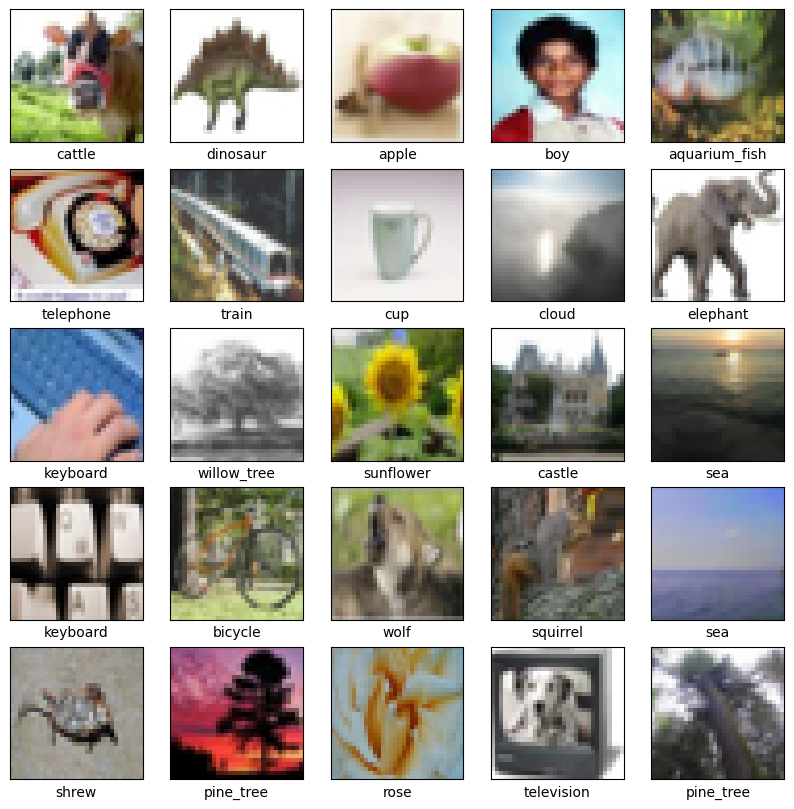

In [12]:
# Function to plot images
def plot_images(images, labels, classes, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(classes[labels[i][0]])
    plt.show()
    
# Plot some training images
plot_images(x_train, y_train, cifar100_labels)

FEATURE SCALING OF THE DATA :-

In [13]:
# Normalize the images to a range of 0 to 1

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
# We import additional libraries

from tensorflow.keras.utils import to_categorical
print('Importing successfully done')

Importing successfully done


In [15]:
# One-hot encode the labels

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 100), (10000, 100))

DATA AUGMENTATION:-

In [17]:
# We import additional libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator
print('Importing successfully done')

Importing successfully done


In [18]:
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
datagen.fit(x_train)

LOAD THE MODEL:-

In [19]:
# We import additional libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
print('Importing successfully done')

Importing successfully done


CREATING SEQUENTIAL MODEL (CNN):-

In [20]:
# Build the model

model = Sequential()
model

<Sequential name=sequential, built=False>

ASSIGNING CONVOLUTIONAL LAYERS AND MAXPOOLING TO THE DATA:-

In [21]:
# Convolutional Layer 1

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 2

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Convolutional Layer 3

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

C:\Users\torne\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ADDING DENSE LAYERS:-

In [22]:
# Flatten the results to feed into a dense layer

model.add(Flatten())

In [23]:
# Fully connected layer

model.add(Dense(64, activation='relu'))

In [24]:
# Output layer

model.add(Dense(100, activation='softmax'))

COMPILE THE MODEL(CNN):-

In [25]:
# Compile the model

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
# Model Summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,268 (309.64 KB)

 Trainable params: 79,268 (309.64 KB)

 Non-trainable params: 0 (0.00 B)

TRAIN THE MODEL(CNN):-

In [28]:
batch_size = 64
epochs = 50

history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.1345 - loss: 3.6794 - val_accuracy: 0.1871 - val_loss: 3.3969
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1719 - loss: 1.7200 - val_accuracy: 0.1829 - val_loss: 3.4238
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.1855 - loss: 3.3959 - val_accuracy: 0.2187 - val_loss: 3.1940
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2188 - loss: 1.6837 - val_accuracy: 0.2177 - val_loss: 3.2066
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.2134 - loss: 3.2365 - val_accuracy: 0.2400 - val_loss: 3.1188
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3750 - loss: 1.4023 - val_accuracy: 0.2352 - val_loss: 3.1408
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.2355 - loss: 3.1066 - val_accuracy: 0.2677 - val_loss: 2.9434
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1875 - loss: 1.5951 - val_accu

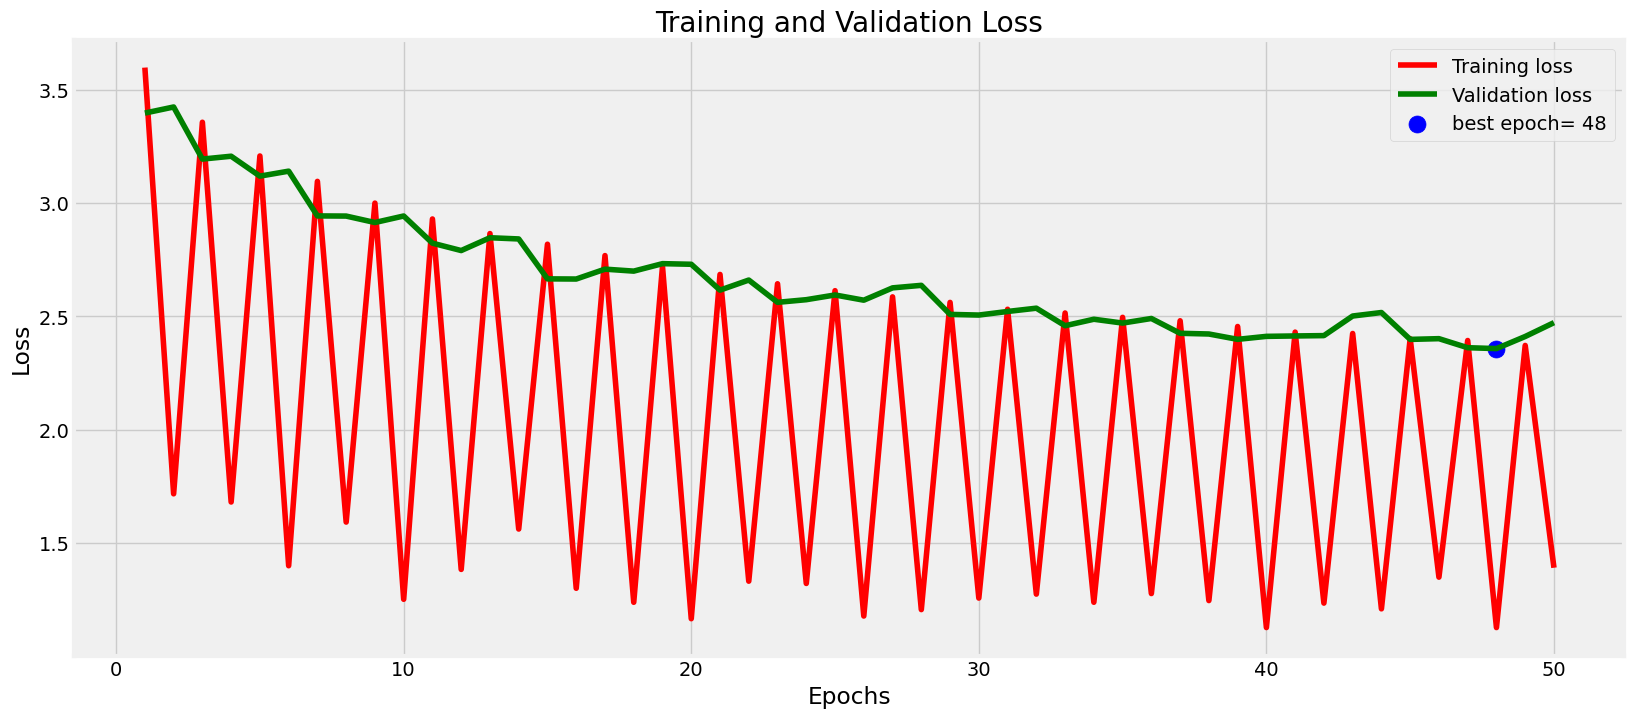

In [29]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [30]:
# Accuracy score:

val_accuracy = np.max(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 39.12%


In [31]:
# Now testing new Model prediction by providing Test Data set

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

EVALUATE THE MODEL (CNN):-

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3760 - loss: 2.4871
Test accuracy: 0.3700000047683716


PLOT TRAINING HISTORY:-

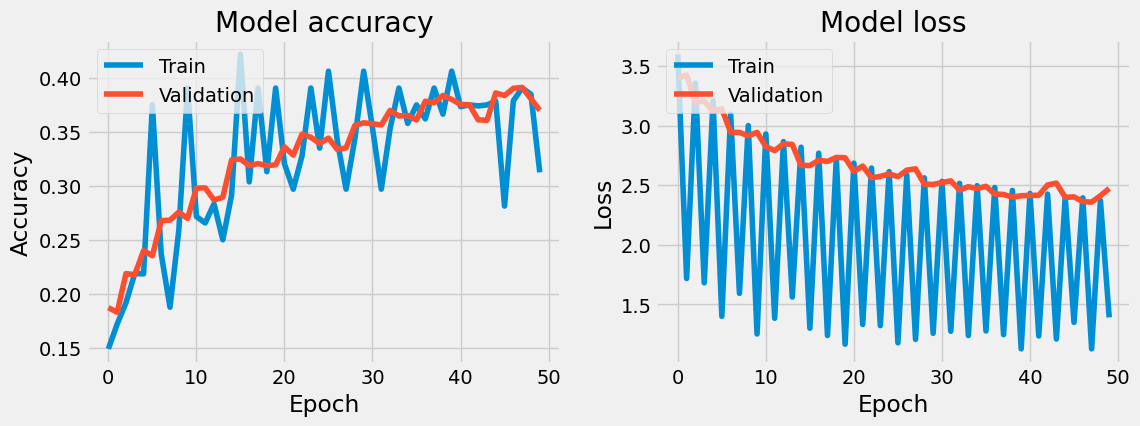

In [34]:
# Visualize training history

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [35]:
# Result:
# The val_accuracy obtaned is 39.12%
# The test accuracy obtained is 37 %
# The best epoch was at 48th cycle.